In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
import pandas as pd

ratings = pd.read_csv( 'ratings.csv' )

### Ratings

In [2]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [3]:
len(ratings)

5976479

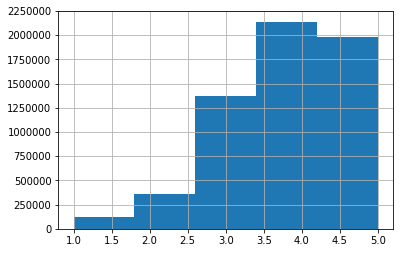

In [4]:
ratings.rating.hist( bins = 5 )

In [5]:
ratings['binary'] = ratings['rating'] > 3

In [6]:
ratings.head()

,user_id,book_id,rating,binary
0,1,258,5,True
1,2,4081,4,True
2,2,260,5,True
3,2,9296,5,True
4,2,2318,3,False


In [7]:
ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


It appears that 4 is the most popular rating. There are relatively few ones and twos.

In [8]:
bookDF=pd.read_csv('books.csv')
bookDF=bookDF.drop(['image_url','small_image_url','title','best_book_id','isbn','isbn13'],axis=1)

In [9]:
bookDF.head()

,book_id,goodreads_book_id,work_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2792775,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,3212258,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,3275794,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,245494,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [10]:
listOfDictionaries=[]
testdf = ratings
indexMap = {}
reverseIndexMap = {}
index = 0
testdf=testdf[['user_id','rating']].groupby(testdf['book_id'])
for key in testdf.groups.keys():
    tempDict={}

    groupDF = testdf.get_group(key)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]]=groupDF.iloc[i,1]
    listOfDictionaries.append(tempDict)
    indexMap[index]=key
    reverseIndexMap[key] = index
    index=index+1

In [11]:
groupDF = testdf.get_group(100)

In [12]:
groupDF.head()

,user_id,rating
211,15,4
262,4,3
301,24,4
1836,123,2
1927,125,4


In [13]:
groupDF.iloc[0,0]

15

In [14]:
len(groupDF)

6343

In [15]:
from sklearn.feature_extraction import DictVectorizer
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictionaries)

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
pairwiseDistances = cosine_distances(vector)
pairwiseSimilarity = cosine_similarity(vector)

In [17]:
def printBookDetails(bookID):
    print("Title:", bookDF[bookDF['book_id']==bookID]['original_title'].values[0])
    print("Author:",bookDF[bookDF['book_id']==bookID]['authors'].values[0])
    print("Printing Book-ID:",bookID)
    print("=================++++++++++++++=========================")


def getTopRecommandations(bookID):
    row = reverseIndexMap[bookID]
    print("------INPUT BOOK--------")
    printBookDetails(bookID)
    print("-------RECOMMENDATIONS----------")
    similarBookIDs = [printBookDetails(indexMap[i]) for i in np.argsort(pairwiseSimilarity[row])[-7:-2][::-1]]

In [18]:
getTopRecommandations(1)

------INPUT BOOK--------
Title: The Hunger Games
Author: Suzanne Collins
Printing Book-ID: 1
=================++++++++++++++=========================
-------RECOMMENDATIONS----------
Title: Mockingjay
Author: Suzanne Collins
Printing Book-ID: 20
=================++++++++++++++=========================
Title: Harry Potter and the Philosopher's Stone
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 2
=================++++++++++++++=========================
Title: Twilight
Author: Stephenie Meyer
Printing Book-ID: 3
=================++++++++++++++=========================
Title: Divergent
Author: Veronica Roth
Printing Book-ID: 12
=================++++++++++++++=========================
Title: The Help
Author: Kathryn Stockett
Printing Book-ID: 31
=================++++++++++++++=========================


In [19]:
pairwiseSimilarity.shape

(10000, 10000)

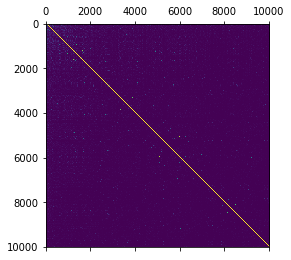

In [20]:
plt.matshow(pairwiseSimilarity)

In [21]:
import scipy.cluster.hierarchy as hcl
from scipy.spatial.distance import squareform

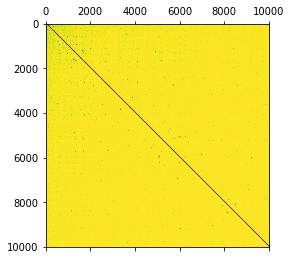

In [22]:
plt.matshow(pairwiseDistances)

In [23]:
pairwiseDistances[2]

array([0.4388581 , 0.47619131, 0.        , ..., 0.99568228, 0.98293998,
       0.99739753])

In [45]:
h = hcl.linkage(squareform(pairwiseDistances),method='complete')

In [46]:
len(h)

9999

# Bicluster search

In [72]:
clusters = hcl.fcluster(h,0.995*pairwiseDistances.max(), 'distance')

In [73]:
len(clusters)

10000

In [79]:
max(clusters)

555

Got 555 clusters

In [123]:
# form users dict
binary_list = list(ratings['binary'])
userid_list = list(ratings['user_id'])
bookid_list = list(ratings['book_id'])
users_dict = {} # dict of user: {cluster: number of high ratings}

In [124]:
for i in range(0,len(binary_list)):
    # if user key exists
    if binary_list[i]:
        if userid_list[i] in users_dict:
            if clusters[bookid_list[i] - 1] in users_dict[userid_list[i]]:
                users_dict[userid_list[i]][clusters[bookid_list[i] - 1]] += 1
            else:
                users_dict[userid_list[i]][clusters[bookid_list[i] - 1]] = 1
        else:
            users_dict[userid_list[i]] = {clusters[bookid_list[i] - 1]: 1}
                


In [125]:
user_clusters = [-1]*max(userid_list)
for key in users_dict.keys():
    v=list(users_dict[key].values())
    k=list(users_dict[key].keys())
    user_clusters[key-1] = k[v.index(max(v))]

In [128]:
user_clusters[203]

470

A random bicluster sample

In [129]:
for i in range(0,len(user_clusters)):
    if user_clusters[i] == 470:
        print('User ', i)

User  7
User  18
User  28
User  33
User  37
User  51
User  61
User  69
User  77
User  81
User  90
User  109
User  113
User  114
User  158
User  170
User  203
User  209
User  211
User  223
User  237
User  259
User  295
User  312
User  336
User  354
User  377
User  379
User  385
User  403
User  457
User  504
User  509
User  511
User  515
User  541
User  547
User  548
User  552
User  567
User  701
User  702
User  717
User  738
User  772
User  774
User  807
User  813
User  836
User  838
User  840
User  845
User  852
User  870
User  882
User  906
User  917
User  919
User  927
User  935
User  941
User  953
User  970
User  994
User  996
User  1022
User  1026
User  1031
User  1068
User  1084
User  1114
User  1131
User  1138
User  1152
User  1155
User  1161
User  1162
User  1188
User  1201
User  1216
User  1239
User  1247
User  1328
User  1334
User  1353
User  1367
User  1389
User  1392
User  1443
User  1451
User  1474
User  1488
User  1503
User  1525
User  1533
User  1536
User  1552
User  1572

User  30448
User  30463
User  30474
User  30478
User  30522
User  30541
User  30546
User  30549
User  30550
User  30600
User  30611
User  30618
User  30619
User  30623
User  30627
User  30663
User  30697
User  30711
User  30717
User  30736
User  30737
User  30744
User  30793
User  30801
User  30813
User  30820
User  30909
User  30939
User  30943
User  30955
User  30961
User  30970
User  30982
User  30993
User  30995
User  31003
User  31014
User  31033
User  31040
User  31048
User  31073
User  31079
User  31128
User  31140
User  31146
User  31160
User  31162
User  31190
User  31197
User  31220
User  31222
User  31226
User  31302
User  31322
User  31381
User  31389
User  31514
User  31543
User  31579
User  31589
User  31688
User  31713
User  31740
User  31749
User  31775
User  31816
User  31817
User  31838
User  31918
User  31935
User  31943
User  31985
User  32023
User  32055
User  32061
User  32083
User  32117
User  32146
User  32173
User  32175
User  32197
User  32207
User  32216
User

In [130]:
for i in range(0,len(clusters)):
    if clusters[i] == 470:
        print('Book ', i)

Book  28
Book  57
Book  70
Book  78
Book  82
Book  94
Book  96
Book  102
Book  115
Book  124
Book  137
Book  153
Book  159
Book  161
Book  171
Book  176
Book  179
Book  193
Book  203
Book  212
Book  292
Book  300
Book  340
Book  360
Book  374
Book  389
Book  412
Book  477
Book  478
Book  484
Book  497
Book  528
Book  530
Book  559
Book  575
Book  589
Book  596
Book  645
Book  649
Book  771
Book  818
Book  934
Book  958
Book  976
Book  983
Book  1134
Book  1166
Book  1177
Book  1213
Book  1279
Book  1363
Book  1431
Book  1525
Book  1678
Book  1724
Book  2001
Book  2051
Book  2075
Book  2365
Book  2731
Book  3021
Book  4148
Book  4272
Book  5829
Book  5939
Book  8915
Book  8948
